# 🌲 Gradient Boosting for Regression

## 🧠 Core Idea

Gradient Boosting builds an **ensemble of weak learners (usually decision trees)** in a **sequential manner**, where each new model corrects the residual errors of the combined previous models.

---

## ⚙️ Algorithm Overview

1. **Initialize** with a constant model:
   $$
   F_0(x) = \arg\min_\gamma \sum_{i=1}^{n} L(y_i, \gamma)
   $$
   For regression with squared error loss, this is simply:
   $$
   F_0(x) = \bar{y}
   $$

2. For $m = 1$ to $M$ (number of iterations):
   - Compute **pseudo-residuals**:
     $$
     r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x) = F_{m-1}(x)}
     $$
     For squared error: $r_{im} = y_i - F_{m-1}(x_i)$
   - Fit a **regression tree** $h_m(x)$ to predict residuals $r_{im}$
   - Compute **step size** (learning rate $\eta$) and optimal multiplier $\gamma_m$:
     $$
     \gamma_m = \arg\min_\gamma \sum_{i=1}^{n} L(y_i, F_{m-1}(x_i) + \gamma \cdot h_m(x_i))
     $$
   - **Update** the model:
     $$
     F_m(x) = F_{m-1}(x) + \eta \cdot \gamma_m \cdot h_m(x)
     $$

---

## 📉 Loss Function

Commonly used loss functions for regression:
- **Squared Error Loss**: $L(y, \hat{y}) = (y - \hat{y})^2$
- **Absolute Error Loss**: $L(y, \hat{y}) = |y - \hat{y}|$
- **Huber Loss**: Combines the robustness of absolute with the sensitivity of squared loss

---

## 🔍 Example: Simple Regression

Let’s predict a target value using Gradient Boosting with MSE loss:
```python
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=1, noise=10)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

print("R^2 on test set:", model.score(X_test, y_test))


In gradient boosting, the first model is always simply the mean of the target data.

The loss function here is pseudo-residual=(actual-predicted)

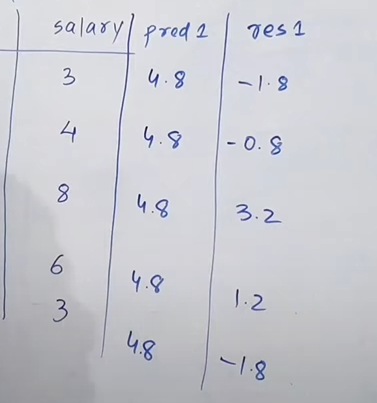

iq, cgpa are input features

Model 2 wil be a decision tree. Here, we will give our input features and make the target variable as the residual1 (the mean model loss function)

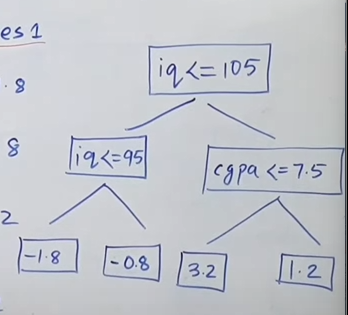

The output of this model is deemed as prediction 2

The final prediction will be the output of (model1+model2)

The idea is quite trivial as we simply did mean + loss function (which was how wrong our model was)

But the problem doing this directly is that we get overfitting

So, we instead do prediction=model1 + learning_rate*model2

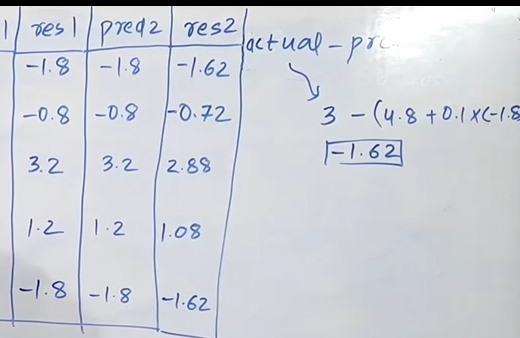

As we keep on adding more models we will decrease the residue to approach 0

Again, take another decision tree as model 3, the input features are the same and the target variable is residue2

The prediction formula would be

y_pred = pred1 + lr*pred2 + lr*pred3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

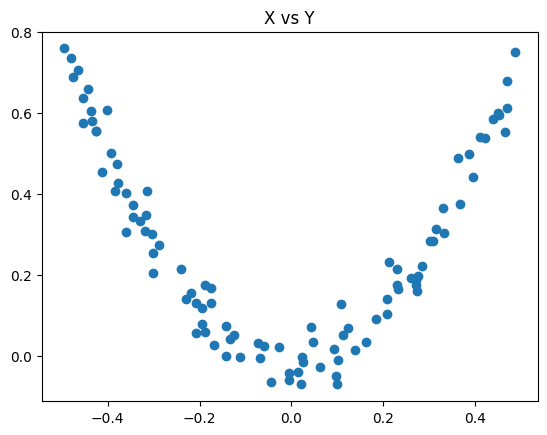

In [7]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [8]:
df['pred1'] = df['y'].mean()

In [9]:
df['res1'] = df['y'] - df['pred1']

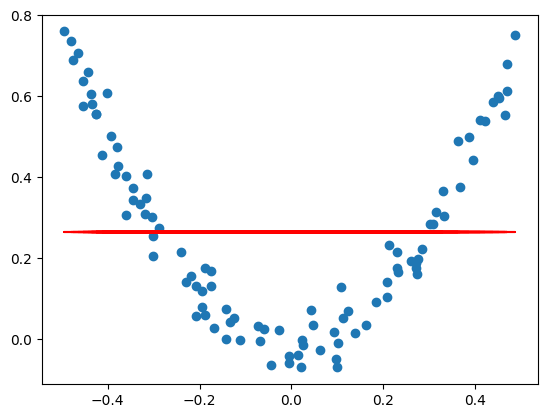

In [10]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
# use 8-32
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [13]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

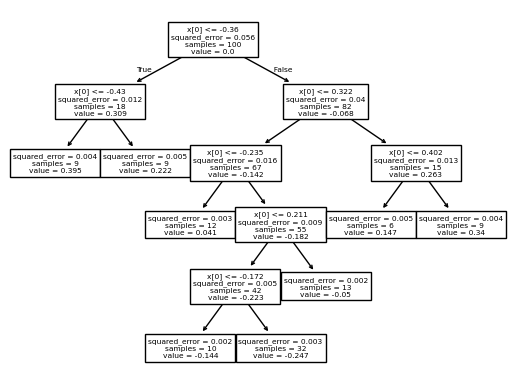

In [14]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [15]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [16]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

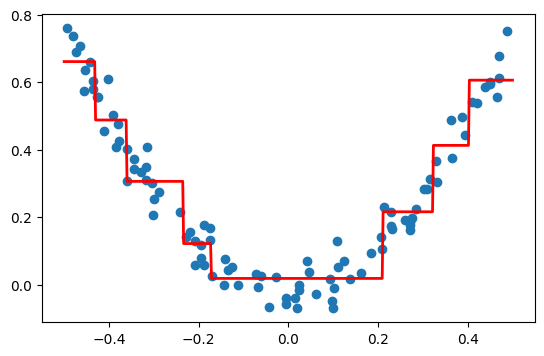

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [18]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [19]:
df['res2'] = df['y'] - df['pred2']

In [20]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [21]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [22]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

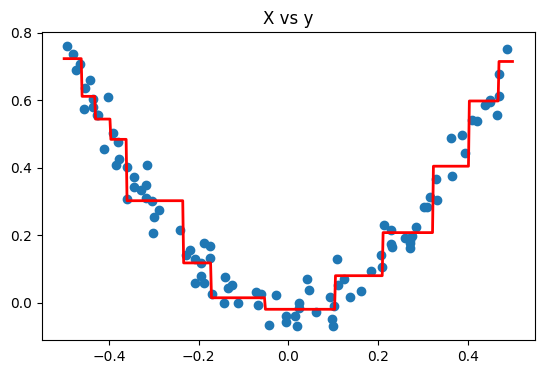

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [24]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


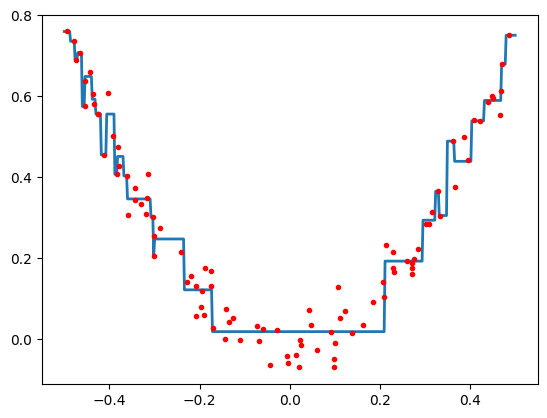

4


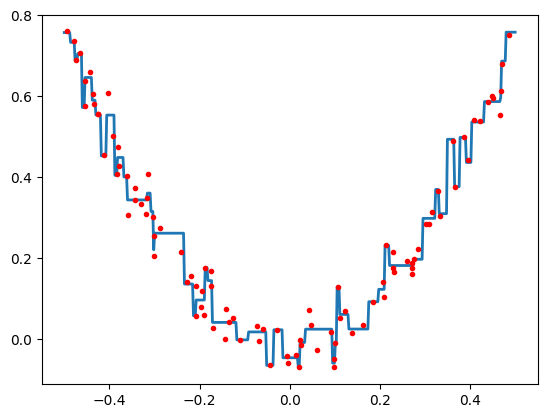

3


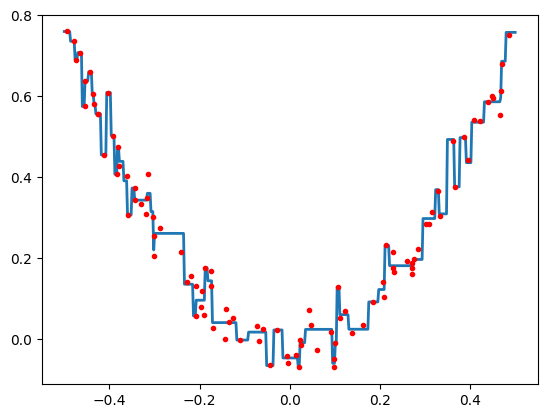

2


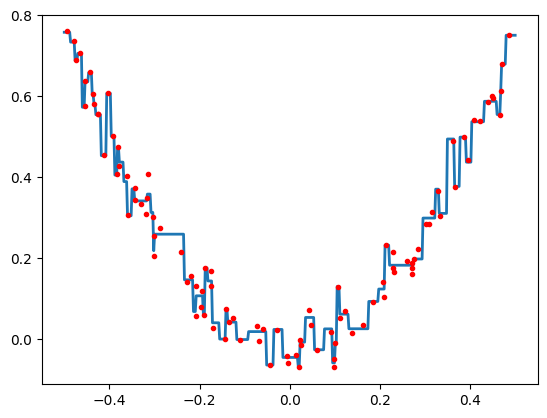

1


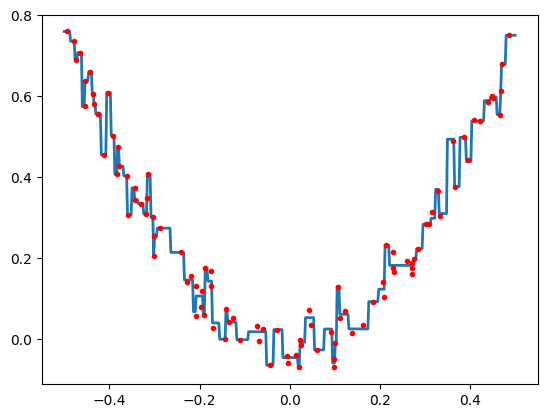

In [25]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)

### Adaboost vs Gradient Boosting

In adaboost we use decision stumps and in gradient boosting we use decision trees with max leaf nodes as 8-32

In adaboost, all the models in it have different weights while predicting it, but in gradient boosting all the models have the same learning rate